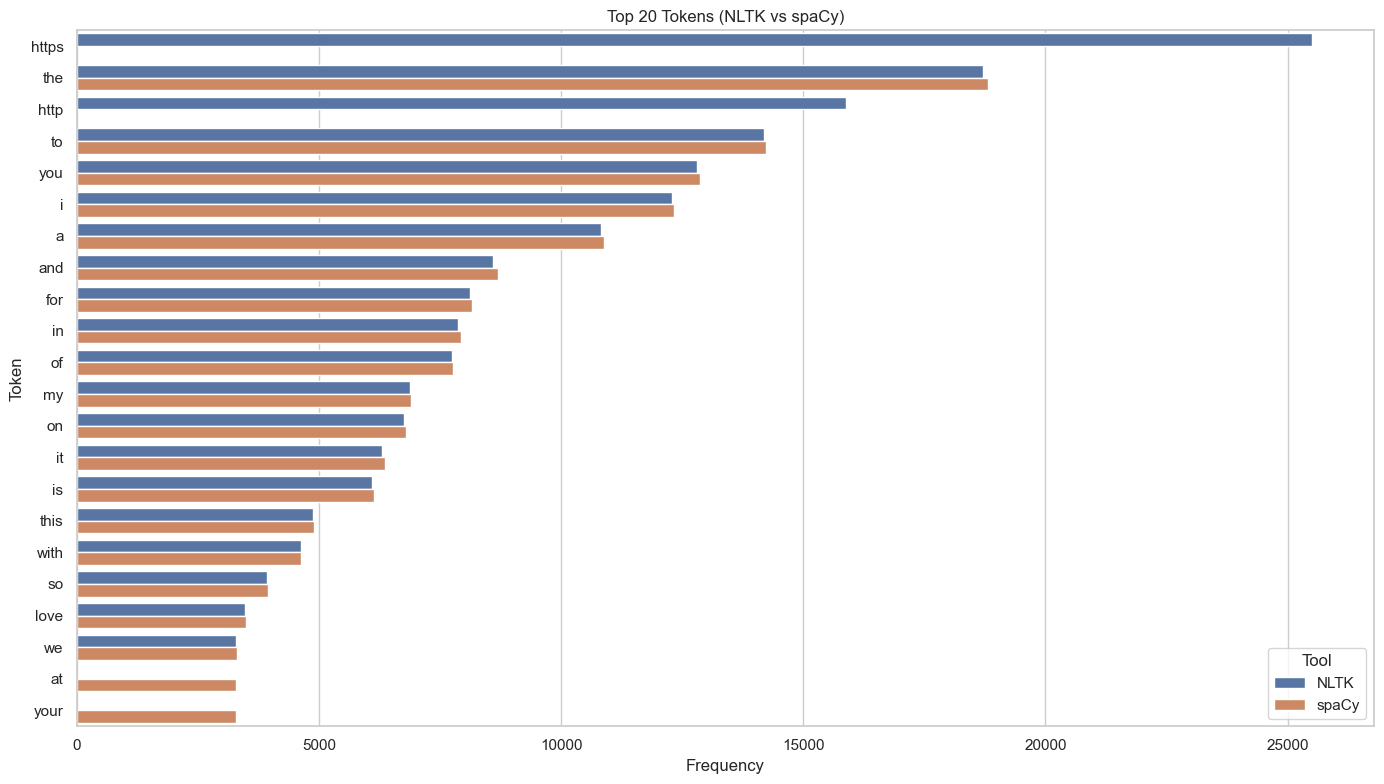

In [1]:
# Cell 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import ast

# Set seaborn style
sns.set(style="whitegrid")

# Cell 2: Load the token results
df = pd.read_csv("data/token_results.csv")

# Cell 3: Convert stringified lists to actual Python lists
df['nltk_tokens'] = df['nltk_tokens'].apply(ast.literal_eval)
df['spacy_tokens'] = df['spacy_tokens'].apply(ast.literal_eval)

df['nltk_lemmas'] = df['nltk_lemmas'].apply(ast.literal_eval)
df['spacy_lemmas'] = df['spacy_lemmas'].apply(ast.literal_eval)

# Cell 4: Flatten the lists of tokens
nltk_token_list = [token.lower() for sublist in df['nltk_tokens'] for token in sublist if token.isalpha()]
spacy_token_list = [token.lower() for sublist in df['spacy_tokens'] for token in sublist if token.isalpha()]

# Cell 5: Get token frequency counts using Counter
nltk_freq = Counter(nltk_token_list)
spacy_freq = Counter(spacy_token_list)

# Convert to DataFrames
nltk_freq_df = pd.DataFrame(nltk_freq.items(), columns=['token', 'frequency'])
spacy_freq_df = pd.DataFrame(spacy_freq.items(), columns=['token', 'frequency'])

# Sort by frequency
nltk_freq_df = nltk_freq_df.sort_values(by='frequency', ascending=False).head(20)
spacy_freq_df = spacy_freq_df.sort_values(by='frequency', ascending=False).head(20)

# Add tool name for combined plotting
nltk_freq_df['tool'] = 'NLTK'
spacy_freq_df['tool'] = 'spaCy'

# Combine both into one DataFrame
combined_df = pd.concat([nltk_freq_df, spacy_freq_df])

# Cell 6: Bar plot of top tokens
plt.figure(figsize=(14, 8))
sns.barplot(data=combined_df, x='frequency', y='token', hue='tool')
plt.title("Top 20 Tokens (NLTK vs spaCy)")
plt.xlabel("Frequency")
plt.ylabel("Token")
plt.legend(title="Tool")
plt.tight_layout()
plt.show()